In [1]:
import sys
sys.path.append("..")

from citibikeAPI import *
from utils import *

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
station_data = getAllStationData()
station_data.to_csv('stations.csv')
# trip_data = pd.read_csv('../../raw/202303-citibike-tripdata.csv')


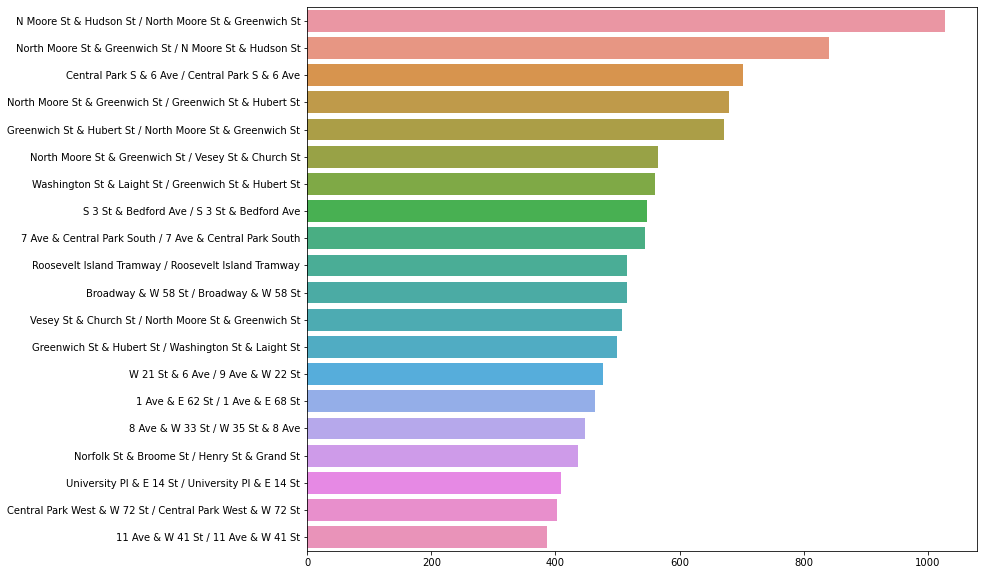

In [31]:
trips=trip_data.value_counts(['start_station_name','end_station_name'])[:20]
trip_names=[trips.index[t][0] + ' / ' + trips.index[t][1] for t in range(len(trips))]
plt.figure(figsize=(12,10))
sns.barplot( x= list(trips.values), y = trip_names, orient="h") ;

In [4]:
trips = trip_data[trip_data['start_station_id'] != trip_data['end_station_id']].value_counts(['start_station_name','end_station_name'])

In [5]:
unique_stations = list(set([trips.index[i][0] for i in range(len(trips))]))

In [6]:
adjacencyDict = {}
for station in unique_stations: 
	try: 
		id = station_data.index[station_data['name']==station][0]
		top_ten_routes = trips[station][:10]
		edges = []
		for route in top_ten_routes.index: 
			edges.append(station_data.index[station_data['name']==route][0])
		adjacencyDict[id] = edges
	except IndexError: 
		pass 
# adjacencyDict[station] = [station_data.index[s['name']==route][0] for route in top_ten_routes.index]

In [8]:
adjacencyDict

{'66dbcdfc-0aca-11e7-82f6-3863bb44ef7c': ['66dbcdfc-0aca-11e7-82f6-3863bb44ef7c',
  '1e226f22-034f-4b99-8184-a8eaa591fbd8',
  '66dbc982-0aca-11e7-82f6-3863bb44ef7c',
  '0138452a-b9f4-4aee-80b0-7fae9a122ffe',
  '66dc3f08-0aca-11e7-82f6-3863bb44ef7c',
  '66dc21d4-0aca-11e7-82f6-3863bb44ef7c',
  '66dea7b5-0aca-11e7-82f6-3863bb44ef7c',
  '61c82689-3f4c-495d-8f44-e71de8f04088',
  '66dd42eb-0aca-11e7-82f6-3863bb44ef7c',
  '95478d78-5e48-44e3-8f95-c63ee31451a9'],
 'ed1199e4-d9a6-4d9e-8c81-62bcd7510a11': ['2ebbe93b-a013-464a-b4a5-0eba96f89676',
  'ed1199e4-d9a6-4d9e-8c81-62bcd7510a11',
  '6908ae75-b9a1-4f20-b192-95dc43e858a8',
  'b1e496f1-43cf-48d0-be49-ab0d760c00bf',
  'b53b5e8f-9503-48d1-b3e3-9347ecef38e2',
  '8603535e-0d7a-4c5b-ae77-27b9f5770bfa',
  '15e1568b-f502-47a2-9d3d-b5aaa1edc239',
  '272c0389-5e4a-41a9-ad6c-2dccdfa55af9',
  '968d40e0-2a5b-4f6c-a161-fad1631b609b',
  'e6f3c665-0c87-4f34-a5e8-69baeed7b7bf'],
 '36ddce8f-bd83-4a05-b601-b526fb4d8628': ['66dbb869-0aca-11e7-82f6-3863bb44ef7

In [28]:
routes = []

for k in adjacencyDict.keys(): 
    if len(station_data.loc[k, 'lon'] > 0) : print(station_data.loc[k, 'lon'])

TypeError: object of type 'numpy.bool_' has no len()

In [7]:
type(stationdd)

ValueError: All arrays must be of the same length

In [ ]:
for station in unique_stations: 
	print(station)
	idx = station_data.index[station_data['name']==station][0]
	print(idx)


Carroll St & Smith St
66de2b97-0aca-11e7-82f6-3863bb44ef7c
Congress St & Clinton St
a76299eb-73f7-401c-aa8b-edff9ef003bd
Columbus Ave & W 95 St
66dde845-0aca-11e7-82f6-3863bb44ef7c
34 Ave & 38 St
548cb08c-4ec1-46d9-8978-1a8d3bf42454
E 97 St & Madison Ave
66de0dfd-0aca-11e7-82f6-3863bb44ef7c
Pleasant Ave & E 116 St
1aa5c287-0f0d-4697-ba4b-4f2daa6b2adf
E 51 St & 2 Ave
632b140c-65de-4f50-9cc2-c001ae011aea
E 6 St & Avenue D
66dbf4ac-0aca-11e7-82f6-3863bb44ef7c
1 Ave & E 44 St
66dc2172-0aca-11e7-82f6-3863bb44ef7c
E 63 St & 3 Ave
199ea9dd-8f7e-4e05-a730-55edaacd8787
11 St & 35 Ave


IndexError: index 0 is out of bounds for axis 0 with size 0

In [26]:
station_data.head()

,name,lat,lon,capacity,legacy_id,num_docks_available,num_bikes_disabled,num_ebikes_available,num_bikes_available,num_docks_disabled,station_status,is_renting,is_returning,last_reported,is_installed
station_id,,,,,,,,,,,,,,,
c3189056-8eda-4278-891f-e8e15c2d759a,Carlton Ave & Dean St,40.680974,-73.971010,29,3537,0,0,0,0,0,out_of_service,0,0,1678109761,0
c71cca54-17f6-42bc-ba94-3f5bd9c70197,Bridge St & Water St,40.702969,-73.984691,47,4590,0,4,0,43,0,active,1,1,1681249318,1
66de6346-0aca-11e7-82f6-3863bb44ef7c,Hoyt St & Warren St,40.684355,-73.989016,35,3421,1,0,0,34,0,active,1,1,1681249349,1
1f8f6714-42a7-45d5-86cd-a093c940b2c9,Grand Concourse & E 161 St,40.827134,-73.922736,27,4635,19,5,2,2,0,active,1,1,1681249350,1
816e50eb-dc4b-47dc-b773-154e2020cb0d,52 St & 6 Ave,40.642703,-74.009441,19,4391,15,1,1,3,0,active,1,1,1681249351,1
